# Taller 1: Modelo Normal - Supuestos e Inferencia

## Descripción
Este taller aborda los supuestos del modelo lineal clásico bajo normalidad, la derivación de estimadores de máxima verosimilitud, las propiedades de estos estimadores, el teorema de Gauss-Markov, el coeficiente de determinación y la aplicación del método de Mínimos Cuadrados Generalizados (GLS).

## Objetivos de Aprendizaje
- Comprender los supuestos del modelo lineal clásico bajo normalidad
- Derivar los estimadores de máxima verosimilitud para los parámetros del modelo
- Analizar las propiedades de los estimadores bajo normalidad
- Comprender el teorema de Gauss-Markov y sus condiciones
- Introducir el coeficiente de determinación 
- Aprender técnicas de diagnóstico para verificar los supuestos del modelo
- Comprender y aplicar el método de Mínimos Cuadrados Generalizados (GLS)

## Contenido
1. Teoría del modelo lineal normal
2. Estimación por máxima verosimilitud
3. Propiedades de los estimadores
4. Teorema de Gauss-Markov
5. Coeficiente de determinación
6. Mínimos Cuadrados Generalizados (GLS)
7. Implementación computacional
8. Diagnóstico de residuos
9. Ejemplos prácticos
10. Ejercicios


In [11]:
# Importación de librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import chi2
import sympy as sp
from sympy import symbols, Matrix, log, det, exp, pi, simplify, solve, diff, Eq
from IPython.display import display, Math, Latex
from mpl_toolkits.mplot3d import Axes3D

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
np.set_printoptions(precision=4, suppress=True)

# Configuración para reproducibilidad
np.random.seed(42)


# 1. Teoría del Modelo Lineal Normal

## 1.1 Definición del Modelo Lineal

El modelo lineal se puede expresar como:

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

Donde:
- $\mathbf{y}$ es un vector de $n$ observaciones de la variable dependiente
- $\mathbf{X}$ es una matriz de diseño de dimensión $n \times p$ que contiene las variables independientes
- $\boldsymbol{\beta}$ es un vector de $p$ parámetros desconocidos
- $\boldsymbol{\varepsilon}$ es un vector de $n$ términos de error aleatorio

## 1.2 Supuestos del Modelo Lineal Normal

El modelo lineal normal clásico se basa en los siguientes supuestos:

1. **Linealidad**: La relación entre las variables independientes y la variable dependiente es lineal.
   $$E(\mathbf{y}|\mathbf{X}) = \mathbf{X}\boldsymbol{\beta}$$

2. **Exogeneidad estricta**: Los errores tienen esperanza cero condicionada a las variables explicativas.
   $$E(\boldsymbol{\varepsilon}|\mathbf{X}) = \mathbf{0}$$

3. **Homocedasticidad y no autocorrelación**: La matriz de varianzas-covarianzas de los errores es esférica.
   $$Var(\boldsymbol{\varepsilon}|\mathbf{X}) = \sigma^2 \mathbf{I}_n$$
   - Homocedasticidad: $Var(\varepsilon_i|\mathbf{X}) = \sigma^2$ para todo $i$
   - No autocorrelación: $Cov(\varepsilon_i, \varepsilon_j|\mathbf{X}) = 0$ para todo $i \neq j$

4. **Rango completo**: La matriz $\mathbf{X}$ tiene rango completo, es decir, $rank(\mathbf{X}) = p < n$.
   Esto implica que no hay multicolinealidad perfecta entre las variables independientes.

5. **Normalidad**: El vector de errores sigue una distribución normal multivariante.
   $$\boldsymbol{\varepsilon}|\mathbf{X} \sim \mathcal{N}(\mathbf{0}, \sigma^2 \mathbf{I}_n)$$

Como consecuencia, la distribución de $\mathbf{y}$ condicionada a $\mathbf{X}$ es:
$$\mathbf{y}|\mathbf{X} \sim \mathcal{N}(\mathbf{X}\boldsymbol{\beta}, \sigma^2 \mathbf{I}_n)$$

## 1.3 Implicaciones de los Supuestos

- La **linealidad** implica que el efecto marginal de cada variable explicativa es constante.

- La **exogeneidad estricta** garantiza que los estimadores sean insesgados.

- La **homocedasticidad** y **no autocorrelación** garantizan que los estimadores de mínimos cuadrados ordinarios (OLS) sean los más eficientes dentro de la clase de estimadores lineales insesgados (propiedad BLUE, del teorema de Gauss-Markov).

- El supuesto de **rango completo** evita la multicolinealidad perfecta, asegurando que existe una única solución para los estimadores.

- La **normalidad** permite realizar inferencia estadística exacta en muestras finitas, como pruebas t y F.

Si los supuestos 1-4 se cumplen pero el supuesto 5 (normalidad) no, los estimadores OLS siguen siendo BLUE, pero la inferencia estadística se basa en resultados asintóticos (para grandes muestras).


# 2. Estimación por Máxima Verosimilitud

## 2.1 Función de Verosimilitud

Bajo el supuesto de normalidad, la función de densidad de probabilidad conjunta de las observaciones $\mathbf{y}$ condicionada a $\mathbf{X}$ es:

$$f(\mathbf{y}|\mathbf{X}, \boldsymbol{\beta}, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\left(-\frac{1}{2\sigma^2}(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})\right)$$

La función de verosimilitud es esta misma expresión, pero vista como función de los parámetros $\boldsymbol{\beta}$ y $\sigma^2$:

$$L(\boldsymbol{\beta}, \sigma^2|\mathbf{y}, \mathbf{X}) = f(\mathbf{y}|\mathbf{X}, \boldsymbol{\beta}, \sigma^2)$$

Es más conveniente trabajar con el logaritmo de la verosimilitud:

$$\ell(\boldsymbol{\beta}, \sigma^2|\mathbf{y}, \mathbf{X}) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2}(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

## 2.2 Derivación de los Estimadores de Máxima Verosimilitud

Para encontrar los estimadores de máxima verosimilitud, calculamos las derivadas parciales de la log-verosimilitud con respecto a $\boldsymbol{\beta}$ y $\sigma^2$, igualamos a cero y resolvemos.

Para $\boldsymbol{\beta}$:
$$\frac{\partial \ell}{\partial \boldsymbol{\beta}} = \frac{1}{\sigma^2}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) = \mathbf{0}$$

Resolviendo para $\boldsymbol{\beta}$:
$$\mathbf{X}^T\mathbf{X}\boldsymbol{\hat{\beta}} = \mathbf{X}^T\mathbf{y}$$
$$\boldsymbol{\hat{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

Este es el estimador de máxima verosimilitud para $\boldsymbol{\beta}$, que coincide con el estimador de mínimos cuadrados ordinarios.

Para $\sigma^2$:
$$\frac{\partial \ell}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) = 0$$

Resolviendo para $\sigma^2$:
$$\hat{\sigma}^2 = \frac{1}{n}(\mathbf{y} - \mathbf{X}\boldsymbol{\hat{\beta}})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\hat{\beta}}) = \frac{1}{n}\sum_{i=1}^n \hat{\varepsilon}_i^2$$

Este es el estimador de máxima verosimilitud para $\sigma^2$. Cabe notar que este estimador es sesgado, a diferencia del estimador insesgado $s^2 = \frac{1}{n-p}\sum_{i=1}^n \hat{\varepsilon}_i^2$.

## 2.3 Demostración Simbólica

A continuación, utilizaremos el módulo sympy para derivar los estimadores de máxima verosimilitud de manera simbólica.


In [12]:
# Derivación simbólica de los estimadores MLE

# Definir símbolos
beta = sp.symbols('beta', commutative=True)
sigma_sq = sp.symbols('sigma_sq', positive=True)
n, p = sp.symbols('n p', integer=True, positive=True)

# Definir matrices simbólicas
X = sp.MatrixSymbol('X', n, p)
y = sp.MatrixSymbol('y', n, 1)
beta_vec = sp.MatrixSymbol('beta', p, 1)
I = sp.Identity(n)

# Función de log-verosimilitud
residual = y - X * beta_vec
log_likelihood = -n/2 * sp.log(2*sp.pi) - n/2 * sp.log(sigma_sq) - (1/(2*sigma_sq)) * (residual.T * residual)[0, 0]

# Derivada respecto a beta
beta_derivative = sp.diff(log_likelihood, beta_vec)
display(Latex(r"Derivada respecto a $\beta$:"))
display(beta_derivative)

# Derivada respecto a sigma^2
sigma_derivative = sp.diff(log_likelihood, sigma_sq)
display(Latex(r"Derivada respecto a $\sigma^2$:"))
display(sigma_derivative)

# Solución para beta (simbólica)
#beta_solution = sp.solve(sp.Eq(X.T * X * beta_vec, X.T * y), beta_vec)
#display(Latex(r"Solución para $\beta$:"))
#display(beta_solution)

# Solución para sigma^2 (simbólica)
#residual_hat = y - X * beta_solution[0]
#sigma_sq_hat = (residual_hat.T * residual_hat)[0, 0] / n
#display(Latex(r"Solución para $\sigma^2$:"))
#display(sigma_sq_hat)


<IPython.core.display.Latex object>

0

<IPython.core.display.Latex object>

-n/(2*sigma_sq) + Sum((y[_i_1, 0] - Sum(X[_i_1, _i_2]*beta[_i_2, 0], (_i_2, 0, p - 1)))*(y[_i_1, 0] - Sum(X[_i_1, _i_3]*beta[_i_3, 0], (_i_3, 0, p - 1))), (_i_1, 0, n - 1))/(2*sigma_sq**2)

# 3. Propiedades de los Estimadores

## 3.1 Propiedades del Estimador de $\boldsymbol{\beta}$

El estimador $\boldsymbol{\hat{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$ tiene las siguientes propiedades:

1. **Insesgadez**:
   $$E(\boldsymbol{\hat{\beta}}|\mathbf{X}) = \boldsymbol{\beta}$$

   Demostración:
   $$E(\boldsymbol{\hat{\beta}}|\mathbf{X}) = E[(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}|\mathbf{X}] = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^TE[\mathbf{y}|\mathbf{X}] = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \boldsymbol{\beta}$$

2. **Matriz de varianzas-covarianzas**:
   $$Var(\boldsymbol{\hat{\beta}}|\mathbf{X}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

   Demostración:
   $$\begin{align}
   Var(\boldsymbol{\hat{\beta}}|\mathbf{X}) &= Var[(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}|\mathbf{X}]\\
   &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T Var(\mathbf{y}|\mathbf{X}) \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\\
   &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T (\sigma^2 \mathbf{I}) \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\\
   &= \sigma^2 (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\\
   &= \sigma^2 (\mathbf{X}^T\mathbf{X})^{-1}
   \end{align}$$

3. **Distribución**:
   $$\boldsymbol{\hat{\beta}}|\mathbf{X} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2(\mathbf{X}^T\mathbf{X})^{-1})$$

   Esto se debe a que $\boldsymbol{\hat{\beta}}$ es una transformación lineal del vector aleatorio $\mathbf{y}$ que sigue una distribución normal.

## 3.2 Propiedades del Estimador de $\sigma^2$

El estimador de máxima verosimilitud $\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n \hat{\varepsilon}_i^2$ tiene las siguientes propiedades:

1. **Sesgo**:
   $$E(\hat{\sigma}^2|\mathbf{X}) = \frac{n-p}{n}\sigma^2$$

   Por lo tanto, es un estimador sesgado.

2. **Estimador insesgado**:
   Un estimador insesgado de $\sigma^2$ es:
   $$s^2 = \frac{1}{n-p}\sum_{i=1}^n \hat{\varepsilon}_i^2 = \frac{n}{n-p}\hat{\sigma}^2$$

3. **Distribución**:
   Bajo normalidad, se puede demostrar que:
   $$\frac{(n-p)s^2}{\sigma^2} \sim \chi^2_{n-p}$$

   Es decir, $(n-p)s^2/\sigma^2$ sigue una distribución chi-cuadrado con $n-p$ grados de libertad.

## 3.3 Propiedades BLUE (Best Linear Unbiased Estimator)

El teorema de Gauss-Markov establece que, bajo los supuestos 1-4 del modelo lineal clásico (sin necesidad del supuesto de normalidad), el estimador de mínimos cuadrados ordinarios (OLS) $\boldsymbol{\hat{\beta}}$ es el mejor estimador lineal insesgado (BLUE).

Esto significa que:
- Es lineal en $\mathbf{y}$: $\boldsymbol{\hat{\beta}} = \mathbf{A}\mathbf{y}$ donde $\mathbf{A} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$
- Es insesgado: $E(\boldsymbol{\hat{\beta}}|\mathbf{X}) = \boldsymbol{\beta}$
- Tiene varianza mínima entre todos los estimadores lineales insesgados

## 3.4 Eficiencia y Consistencia

1. **Eficiencia**:
   Bajo normalidad, los estimadores de máxima verosimilitud son eficientes, es decir, alcanzan la cota inferior de Cramér-Rao, que representa la mínima varianza posible para un estimador insesgado.

2. **Consistencia**:
   Los estimadores $\boldsymbol{\hat{\beta}}$ y $s^2$ son consistentes, lo que significa que convergen en probabilidad a los verdaderos valores de los parámetros a medida que el tamaño de la muestra aumenta:
   $$\boldsymbol{\hat{\beta}} \stackrel{p}{\to} \boldsymbol{\beta} \quad \text{y} \quad s^2 \stackrel{p}{\to} \sigma^2 \quad \text{cuando} \quad n \to \infty$$


# 3.5 Teorema de Gauss-Markov

El teorema de Gauss-Markov es un resultado fundamental en la teoría de regresión lineal que establece las condiciones bajo las cuales el estimador de Mínimos Cuadrados Ordinarios (OLS) es el Mejor Estimador Lineal Insesgado (BLUE, por sus siglas en inglés).

## 3.5.1 Enunciado del Teorema

El teorema de Gauss-Markov establece que, bajo ciertas condiciones (conocidas como condiciones de Gauss-Markov), el estimador OLS $\boldsymbol{\hat{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$ tiene la mínima varianza entre todos los estimadores lineales insesgados.

## 3.5.2 Condiciones de Gauss-Markov

Las condiciones de Gauss-Markov son:

1. **Linealidad en los parámetros**: El modelo puede expresarse como $\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$, donde los parámetros $\boldsymbol{\beta}$ entran linealmente.

2. **Muestreo aleatorio**: Las observaciones son una muestra aleatoria de la población.

3. **No colinealidad perfecta**: No existe una relación lineal exacta entre las variables independientes (es decir, $\mathbf{X}$ tiene rango completo).

4. **Exogeneidad media condicional**: El valor esperado del término de error dado $\mathbf{X}$ es cero, es decir, $E(\boldsymbol{\varepsilon}|\mathbf{X}) = \mathbf{0}$. Esto implica que $E(\mathbf{y}|\mathbf{X}) = \mathbf{X}\boldsymbol{\beta}$.

5. **Homocedasticidad**: La varianza del error es constante y no depende de las variables independientes, es decir, $Var(\varepsilon_i|\mathbf{X}) = \sigma^2$ para todo $i$.

6. **No autocorrelación**: Los errores no están correlacionados entre sí, es decir, $Cov(\varepsilon_i, \varepsilon_j|\mathbf{X}) = 0$ para todo $i \neq j$.

## 3.5.3 Implicaciones del Teorema

El teorema de Gauss-Markov tiene varias implicaciones importantes:

1. **Eficiencia**: Entre todos los estimadores lineales insesgados, OLS tiene la mínima varianza. Esto significa que OLS es el estimador más preciso (eficiente) dentro de la clase de estimadores lineales insesgados.

2. **Importancia de las condiciones**: Si alguna de las condiciones de Gauss-Markov no se cumple, OLS puede dejar de ser BLUE. Por ejemplo:
   - Si hay heterocedasticidad, OLS sigue siendo insesgado pero no eficiente. En este caso, Mínimos Cuadrados Ponderados (WLS) puede ser más eficiente.
   - Si hay autocorrelación, OLS sigue siendo insesgado pero no eficiente. En este caso, Mínimos Cuadrados Generalizados (GLS) puede ser más eficiente.

3. **Normalidad no requerida**: El teorema de Gauss-Markov no requiere que los errores sigan una distribución normal. La normalidad solo es necesaria para la inferencia estadística exacta en muestras finitas (pruebas t, F, etc.).

## 3.5.4 Demostración del Teorema (Esbozo)

Consideremos cualquier estimador lineal de la forma $\tilde{\boldsymbol{\beta}} = \mathbf{C}\mathbf{y}$, donde $\mathbf{C}$ es una matriz $p \times n$.

Para que $\tilde{\boldsymbol{\beta}}$ sea insesgado, debe cumplirse:
$$E(\tilde{\boldsymbol{\beta}}|\mathbf{X}) = \boldsymbol{\beta} \implies \mathbf{C}\mathbf{X} = \mathbf{I}_p$$

Si definimos $\mathbf{A} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$, entonces $\boldsymbol{\hat{\beta}} = \mathbf{A}\mathbf{y}$ y $\mathbf{A}\mathbf{X} = \mathbf{I}_p$.

Se puede demostrar que cualquier estimador lineal insesgado $\tilde{\boldsymbol{\beta}} = \mathbf{C}\mathbf{y}$ puede escribirse como:
$$\tilde{\boldsymbol{\beta}} = \boldsymbol{\hat{\beta}} + \mathbf{D}\mathbf{y}$$
donde $\mathbf{D}$ es tal que $\mathbf{D}\mathbf{X} = \mathbf{0}$.

Bajo las condiciones de Gauss-Markov, se demuestra que:
$$Var(\tilde{\boldsymbol{\beta}}|\mathbf{X}) = Var(\boldsymbol{\hat{\beta}}|\mathbf{X}) + \mathbf{D}Var(\mathbf{y}|\mathbf{X})\mathbf{D}^T$$

Como $Var(\mathbf{y}|\mathbf{X}) = \sigma^2\mathbf{I}_n$ (por homocedasticidad y no autocorrelación) y $\mathbf{D}Var(\mathbf{y}|\mathbf{X})\mathbf{D}^T$ es una matriz semidefinida positiva, se concluye que $Var(\tilde{\boldsymbol{\beta}}|\mathbf{X}) \geq Var(\boldsymbol{\hat{\beta}}|\mathbf{X})$ en el sentido de que la diferencia es una matriz semidefinida positiva.

Por lo tanto, $\boldsymbol{\hat{\beta}}$ es BLUE.


# 4. Coeficiente de Determinación

## 4.1 Definición y Cálculo

El coeficiente de determinación, denotado como $R^2$, mide la proporción de la varianza total de la variable dependiente que es explicada por el modelo. Se calcula como:

$$R^2 = 1 - \frac{SSR}{SST} = \frac{SSE}{SST}$$

Donde:
- $SSR = \sum_{i=1}^n \hat{\varepsilon}_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2$ es la suma de cuadrados de los residuos
- $SST = \sum_{i=1}^n (y_i - \bar{y})^2$ es la suma total de cuadrados
- $SSE = SST - SSR = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2$ es la suma de cuadrados explicada

## 4.2 Interpretación

- $R^2 = 1$: El modelo explica perfectamente la variabilidad de la variable dependiente.
- $R^2 = 0$: El modelo no explica nada de la variabilidad de la variable dependiente.
- En general, $0 \leq R^2 \leq 1$, y un valor más alto indica un mejor ajuste del modelo.

## 4.3 Limitaciones del $R^2$

1. **Aumento con variables adicionales**:
   El $R^2$ siempre aumenta (o al menos no disminuye) cuando se añaden variables al modelo, incluso si estas no son realmente útiles.

2. **$R^2$ ajustado**:
   Para corregir el problema anterior, se utiliza el $R^2$ ajustado:
   $$R^2_{adj} = 1 - \frac{n-1}{n-p} \left(1 - R^2\right)$$

   El $R^2$ ajustado penaliza la adición de variables que no mejoran sustancialmente el modelo.

3. **No mide la calidad predictiva**:
   Un $R^2$ alto no garantiza un buen poder predictivo fuera de la muestra.

4. **No indica causalidad**:
   Un $R^2$ alto no implica relaciones causales entre las variables.

## 4.4 Relación con el Coeficiente de Correlación

En el caso de regresión lineal simple (una sola variable independiente), el coeficiente de determinación $R^2$ es igual al cuadrado del coeficiente de correlación de Pearson $r$ entre las variables dependiente e independiente:

$$R^2 = r^2$$

Donde $r$ es el coeficiente de correlación entre $y$ y $x$:

$$r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2 \sum_{i=1}^n (y_i - \bar{y})^2}}$$

## 4.5 Interpretación Geométrica

Desde un punto de vista geométrico, el $R^2$ puede interpretarse como el coseno cuadrado del ángulo entre el vector de observaciones centrado $\mathbf{y} - \bar{y}\mathbf{1}$ y su proyección en el espacio columna de la matriz $\mathbf{X}$ (también centrada si incluye una constante).


# 5. Mínimos Cuadrados Generalizados (GLS)

## 5.1 Motivación

Cuando se viola el supuesto de homocedasticidad y no autocorrelación, es decir, cuando:

$$Var(\boldsymbol{\varepsilon}|\mathbf{X}) = \boldsymbol{\Omega} \neq \sigma^2 \mathbf{I}_n$$

el estimador de mínimos cuadrados ordinarios (OLS) sigue siendo insesgado pero ya no es el más eficiente. En este caso, se utiliza el método de Mínimos Cuadrados Generalizados (GLS).

## 5.2 Formulación del Modelo GLS

El modelo GLS asume:

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

Con:
$$E(\boldsymbol{\varepsilon}|\mathbf{X}) = \mathbf{0}$$
$$Var(\boldsymbol{\varepsilon}|\mathbf{X}) = \boldsymbol{\Omega}$$

Donde $\boldsymbol{\Omega}$ es una matriz simétrica definida positiva conocida (o estimada).

## 5.3 Estimador GLS

El estimador de mínimos cuadrados generalizados se obtiene minimizando la forma cuadrática:

$$Q(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T \boldsymbol{\Omega}^{-1} (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

La solución es:

$$\boldsymbol{\hat{\beta}}_{GLS} = (\mathbf{X}^T \boldsymbol{\Omega}^{-1} \mathbf{X})^{-1} \mathbf{X}^T \boldsymbol{\Omega}^{-1} \mathbf{y}$$

## 5.4 Propiedades del Estimador GLS

1. **Insesgadez**:
   $$E(\boldsymbol{\hat{\beta}}_{GLS}|\mathbf{X}) = \boldsymbol{\beta}$$

2. **Matriz de varianzas-covarianzas**:
   $$Var(\boldsymbol{\hat{\beta}}_{GLS}|\mathbf{X}) = (\mathbf{X}^T \boldsymbol{\Omega}^{-1} \mathbf{X})^{-1}$$

3. **Eficiencia**:
   El estimador GLS es el mejor estimador lineal insesgado (BLUE) cuando la matriz $\boldsymbol{\Omega}$ es conocida.

## 5.5 Transformación del Modelo

El método GLS puede verse como una transformación del modelo original para restaurar las condiciones de Gauss-Markov.

Como $\boldsymbol{\Omega}$ es simétrica definida positiva, existe una matriz $\mathbf{P}$ tal que $\boldsymbol{\Omega} = \mathbf{P}\mathbf{P}^T$. Definiendo:

$$\mathbf{y}^* = \mathbf{P}^{-1}\mathbf{y}$$
$$\mathbf{X}^* = \mathbf{P}^{-1}\mathbf{X}$$
$$\boldsymbol{\varepsilon}^* = \mathbf{P}^{-1}\boldsymbol{\varepsilon}$$

El modelo transformado es:

$$\mathbf{y}^* = \mathbf{X}^*\boldsymbol{\beta} + \boldsymbol{\varepsilon}^*$$

Con:
$$E(\boldsymbol{\varepsilon}^*|\mathbf{X}^*) = \mathbf{0}$$
$$Var(\boldsymbol{\varepsilon}^*|\mathbf{X}^*) = \sigma^2 \mathbf{I}_n$$

Aplicando OLS a este modelo transformado, se obtiene el estimador GLS.

## 5.6 Mínimos Cuadrados Ponderados (WLS)

Un caso particular de GLS es cuando $\boldsymbol{\Omega}$ es diagonal, es decir, cuando hay heterocedasticidad pero no autocorrelación:

$$\boldsymbol{\Omega} = \text{diag}(\sigma_1^2, \sigma_2^2, \ldots, \sigma_n^2)$$

En este caso, el método se llama Mínimos Cuadrados Ponderados (WLS, por sus siglas en inglés) y el estimador es:

$$\boldsymbol{\hat{\beta}}_{WLS} = \left(\sum_{i=1}^n \frac{1}{\sigma_i^2}\mathbf{x}_i\mathbf{x}_i^T\right)^{-1} \left(\sum_{i=1}^n \frac{1}{\sigma_i^2}y_i\mathbf{x}_i\right)$$

Donde $\mathbf{x}_i$ es la i-ésima fila de $\mathbf{X}$.

## 5.7 Estimación Factible de GLS (FGLS)

En la práctica, la matriz $\boldsymbol{\Omega}$ suele ser desconocida y debe estimarse. El procedimiento es:

1. Estimar $\boldsymbol{\beta}$ mediante OLS: $\boldsymbol{\hat{\beta}}_{OLS}$
2. Calcular los residuos: $\hat{\boldsymbol{\varepsilon}} = \mathbf{y} - \mathbf{X}\boldsymbol{\hat{\beta}}_{OLS}$
3. Estimar $\boldsymbol{\Omega}$ a partir de estos residuos
4. Calcular el estimador GLS usando la matriz $\boldsymbol{\hat{\Omega}}$ estimada:
   $$\boldsymbol{\hat{\beta}}_{FGLS} = (\mathbf{X}^T \boldsymbol{\hat{\Omega}}^{-1} \mathbf{X})^{-1} \mathbf{X}^T \boldsymbol{\hat{\Omega}}^{-1} \mathbf{y}$$

Este procedimiento puede iterarse hasta alcanzar la convergencia.


# 6. Implementación Computacional

## 6.1 Implementación de Mínimos Cuadrados Ordinarios (OLS)

Implementaremos desde cero el estimador OLS, calcularemos sus propiedades y lo compararemos con la implementación de statsmodels.


In [13]:
# Implementación de estimadores OLS desde cero

def ols_estimator(X, y):
    """
    Calcula el estimador de mínimos cuadrados ordinarios

    Args:
        X: matriz de diseño de dimensión (n, p)
        y: vector de observaciones de dimensión (n, 1)

    Returns:
        beta_hat: estimador OLS de los parámetros
        sigma2_hat: estimador de la varianza del error
        sigma2_unbiased: estimador insesgado de la varianza del error
        var_beta_hat: matriz de varianzas-covarianzas del estimador
        fitted_values: valores ajustados
        residuals: residuos
        R2: coeficiente de determinación
        R2_adj: coeficiente de determinación ajustado
    """
    # Asegurar que X e y sean arrays de numpy
    X = np.asarray(X)
    y = np.asarray(y)

    # Obtener dimensiones
    n, p = X.shape

    # Calcular beta_hat = (X'X)^(-1)X'y
    XtX = X.T @ X
    XtX_inv = np.linalg.inv(XtX)
    Xty = X.T @ y
    beta_hat = XtX_inv @ Xty

    # Calcular valores ajustados y residuos
    fitted_values = X @ beta_hat
    residuals = y - fitted_values

    # Calcular sigma^2 (estimador ML)
    sigma2_hat = np.sum(residuals**2) / n

    # Calcular sigma^2 (estimador insesgado)
    sigma2_unbiased = np.sum(residuals**2) / (n - p)

    # Calcular matriz de varianzas-covarianzas
    var_beta_hat = sigma2_unbiased * XtX_inv

    # Calcular R^2
    SSR = np.sum(residuals**2)
    SST = np.sum((y - np.mean(y))**2)
    R2 = 1 - SSR/SST

    # Calcular R^2 ajustado
    R2_adj = 1 - (n-1)/(n-p) * (1 - R2)

    return {
        'beta_hat': beta_hat,
        'sigma2_hat': sigma2_hat,
        'sigma2_unbiased': sigma2_unbiased,
        'var_beta_hat': var_beta_hat,
        'fitted_values': fitted_values,
        'residuals': residuals,
        'R2': R2,
        'R2_adj': R2_adj
    }

def gls_estimator(X, y, Omega):
    """
    Calcula el estimador de mínimos cuadrados generalizados

    Args:
        X: matriz de diseño de dimensión (n, p)
        y: vector de observaciones de dimensión (n, 1)
        Omega: matriz de varianzas-covarianzas de los errores

    Returns:
        beta_hat: estimador GLS de los parámetros
        var_beta_hat: matriz de varianzas-covarianzas del estimador
        fitted_values: valores ajustados
        residuals: residuos
    """
    # Asegurar que X, y y Omega sean arrays de numpy
    X = np.asarray(X)
    y = np.asarray(y)
    Omega = np.asarray(Omega)

    # Obtener dimensiones
    n, p = X.shape

    # Calcular la inversa de Omega
    Omega_inv = np.linalg.inv(Omega)

    # Calcular beta_hat_gls = (X'Omega^(-1)X)^(-1)X'Omega^(-1)y
    XtOmega_invX = X.T @ Omega_inv @ X
    XtOmega_invX_inv = np.linalg.inv(XtOmega_invX)
    XtOmega_invy = X.T @ Omega_inv @ y
    beta_hat = XtOmega_invX_inv @ XtOmega_invy

    # Calcular valores ajustados y residuos
    fitted_values = X @ beta_hat
    residuals = y - fitted_values

    # Calcular matriz de varianzas-covarianzas
    var_beta_hat = XtOmega_invX_inv

    return {
        'beta_hat': beta_hat,
        'var_beta_hat': var_beta_hat,
        'fitted_values': fitted_values,
        'residuals': residuals
    }

def wls_estimator(X, y, weights):
    """
    Calcula el estimador de mínimos cuadrados ponderados

    Args:
        X: matriz de diseño de dimensión (n, p)
        y: vector de observaciones de dimensión (n, 1)
        weights: vector de pesos (inversos de las varianzas)

    Returns:
        beta_hat: estimador WLS de los parámetros
        var_beta_hat: matriz de varianzas-covarianzas del estimador
        fitted_values: valores ajustados
        residuals: residuos
    """
    # Asegurar que X, y y weights sean arrays de numpy
    X = np.asarray(X)
    y = np.asarray(y)
    weights = np.asarray(weights)

    # Obtener dimensiones
    n, p = X.shape

    # Crear matriz de pesos W (diagonal)
    W = np.diag(weights)

    # Calcular beta_hat_wls = (X'WX)^(-1)X'Wy
    XtWX = X.T @ W @ X
    XtWX_inv = np.linalg.inv(XtWX)
    XtWy = X.T @ W @ y
    beta_hat = XtWX_inv @ XtWy

    # Calcular valores ajustados y residuos
    fitted_values = X @ beta_hat
    residuals = y - fitted_values

    # Calcular matriz de varianzas-covarianzas
    var_beta_hat = XtWX_inv

    return {
        'beta_hat': beta_hat,
        'var_beta_hat': var_beta_hat,
        'fitted_values': fitted_values,
        'residuals': residuals
    }


# 7.2 Diagnóstico de Residuos

Una parte crucial del análisis de regresión es verificar si los supuestos del modelo se cumplen a través del diagnóstico de los residuos. Dos herramientas importantes para este propósito son los gráficos Q-Q y la prueba de Breusch-Pagan.

## 7.2.1 Gráficos Q-Q (Quantile-Quantile)

Los gráficos Q-Q son una herramienta visual para evaluar si un conjunto de datos sigue una distribución teórica específica, en nuestro caso, la distribución normal. 

### ¿Por qué usamos gráficos Q-Q?

1. **Evaluación del supuesto de normalidad**: En el modelo lineal normal, asumimos que los errores siguen una distribución normal. El gráfico Q-Q nos permite verificar este supuesto visualmente.

2. **Detección de valores atípicos**: Los puntos que se desvían significativamente de la línea de referencia pueden indicar la presencia de valores atípicos.

3. **Identificación de asimetría y colas pesadas**: Patrones sistemáticos de desviación de la línea de referencia pueden revelar asimetría (skewness) o colas más pesadas o ligeras que la distribución normal.

### Interpretación de gráficos Q-Q:

- Si los puntos se alinean aproximadamente en una línea recta, sugiere que los residuos siguen una distribución normal.
- Desviaciones en los extremos (colas) pueden indicar colas más pesadas o ligeras que la normal.
- Patrones en forma de S indican asimetría.
- Puntos aislados pueden corresponder a valores atípicos.

## 7.2.2 Prueba de Breusch-Pagan

La prueba de Breusch-Pagan es una prueba estadística para detectar heterocedasticidad en los residuos de un modelo de regresión.

### ¿Por qué usamos la prueba de Breusch-Pagan?

1. **Detección de heterocedasticidad**: La heterocedasticidad viola uno de los supuestos clave del modelo lineal clásico (varianza constante del error), lo que afecta la eficiencia de los estimadores OLS y la validez de la inferencia estadística.

2. **Test formal**: Mientras que los gráficos de residuos proporcionan una evaluación visual, la prueba de Breusch-Pagan ofrece un criterio estadístico formal para la detección de heterocedasticidad.

3. **Diagnóstico para aplicar GLS**: Si se detecta heterocedasticidad, podemos justificar el uso de métodos como WLS o GLS en lugar de OLS.

### Procedimiento de la prueba de Breusch-Pagan:

1. Ajustar el modelo de regresión y obtener los residuos.
2. Calcular los residuos al cuadrado.
3. Realizar una regresión de los residuos al cuadrado sobre las variables independientes.
4. Calcular el estadístico de prueba como n·R², donde n es el número de observaciones y R² es el coeficiente de determinación de esta regresión auxiliar.
5. Este estadístico sigue aproximadamente una distribución chi-cuadrado con p-1 grados de libertad bajo la hipótesis nula de homocedasticidad.

### Interpretación de la prueba de Breusch-Pagan:

- **Hipótesis nula (H₀)**: Homocedasticidad (varianza constante).
- **Hipótesis alternativa (H₁)**: Heterocedasticidad (varianza no constante).
- Si el p-valor es menor que el nivel de significancia (típicamente 0.05), rechazamos la hipótesis nula y concluimos que hay evidencia de heterocedasticidad.

La presencia de heterocedasticidad no afecta la insesgadez de los estimadores OLS, pero sí su eficiencia y la validez de los intervalos de confianza y pruebas de hipótesis basados en ellos. En estos casos, podemos recurrir a métodos como WLS o GLS, o utilizar errores estándar robustos a la heterocedasticidad.


# 7. Ejemplos Prácticos

## 7.1 Datos Simulados: Modelo Lineal Normal

Vamos a generar datos que cumplan con los supuestos del modelo lineal normal y aplicar los diferentes estimadores.


Primeras filas de los datos generados:
          y        x1        x2        x3
0  0.628366  0.496714 -0.138264  0.647689
1 -1.806688  1.523030 -0.234153 -0.234137
2  1.125839  1.579213  0.767435 -0.469474
3  1.860864  0.542560 -0.463418 -0.465730
4 -1.386533  0.241962 -1.913280 -1.724918

Estadísticas descriptivas:
                y          x1          x2          x3
count  100.000000  100.000000  100.000000  100.000000
mean     2.510024    0.091766   -0.183233    0.074822
std      2.750368    0.824799    0.979100    1.112910
min     -3.938665   -1.952088   -3.241267   -2.619745
25%      0.738463   -0.480439   -0.829801   -0.709340
50%      2.735519    0.203962   -0.228808    0.115196
75%      4.329138    0.500982    0.538170    0.765998
max      9.944611    2.143944    2.314659    3.852731


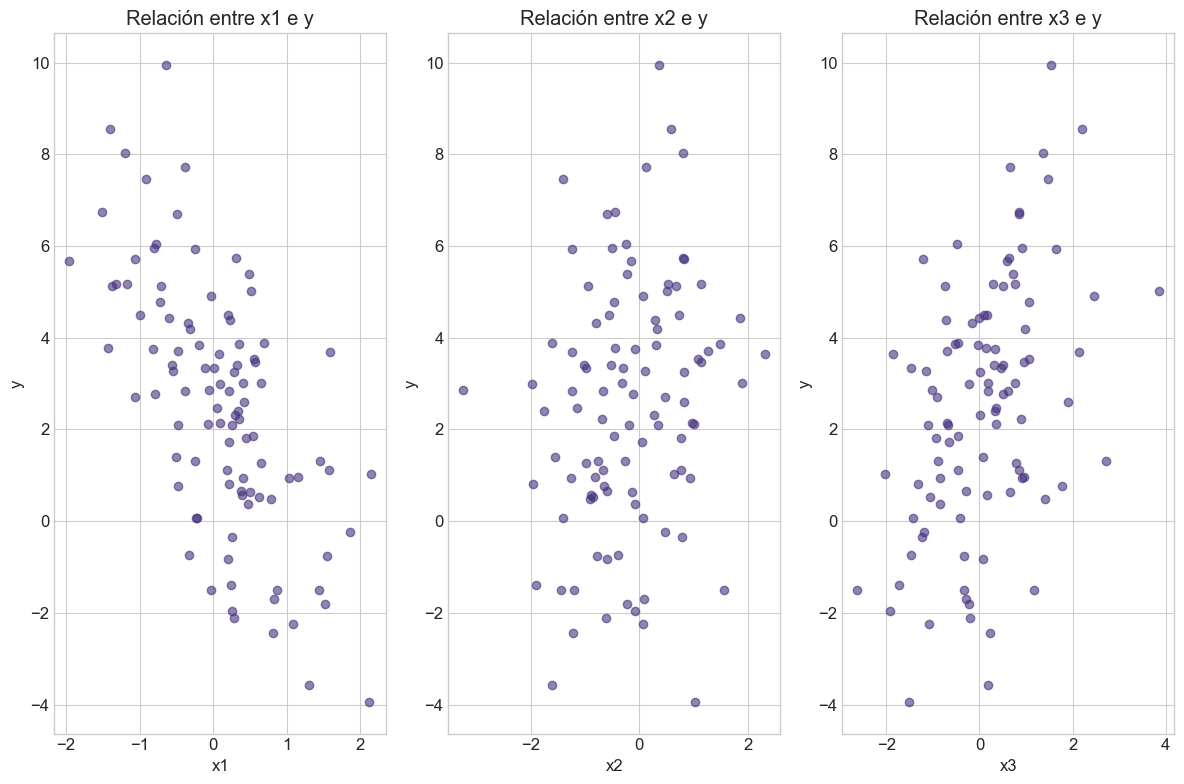

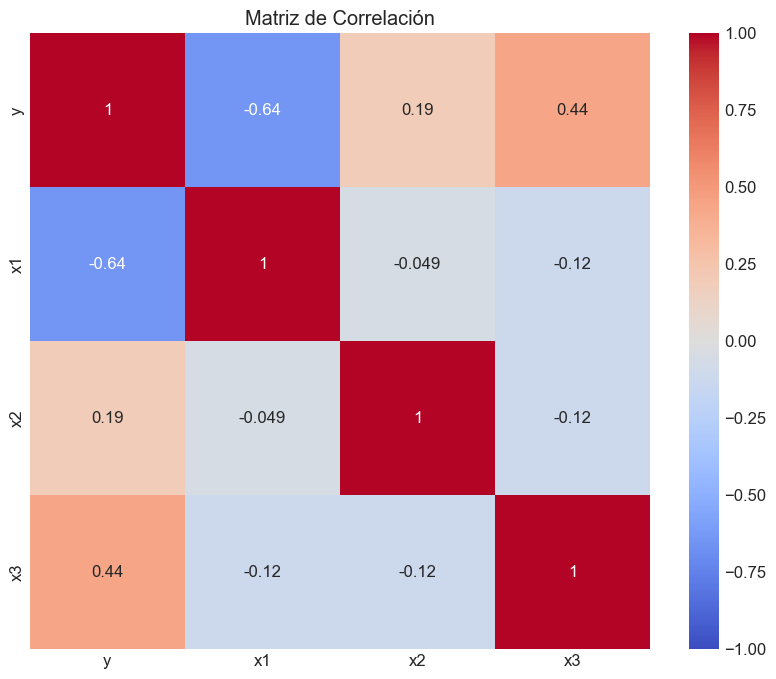

In [14]:
# Generar datos que cumplan con los supuestos del modelo lineal normal

# Parámetros de la simulación
n = 100  # Número de observaciones
p = 3    # Número de variables (sin incluir intercepto)
beta_true = np.array([2.5, -1.8, 0.7, 1.2])  # Coeficientes verdaderos (incluye intercepto)
sigma = 2.0  # Desviación estándar del error

# Generar matriz de diseño
X = np.random.normal(0, 1, size=(n, p))
X_with_intercept = np.column_stack((np.ones(n), X))  # Añadir columna de unos para el intercepto

# Generar errores normales
epsilon = np.random.normal(0, sigma, size=n)

# Generar la variable dependiente
y = X_with_intercept @ beta_true + epsilon

# Mostrar las primeras filas de los datos
data = pd.DataFrame(np.column_stack((y, X)), 
                    columns=['y', 'x1', 'x2', 'x3'])
print("Primeras filas de los datos generados:")
print(data.head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

# Visualizar relaciones entre las variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(['x1', 'x2', 'x3']):
    plt.subplot(1, 3, i+1)
    plt.scatter(data[col], data['y'], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('y')
    plt.title(f'Relación entre {col} e y')
plt.tight_layout()
plt.show()

# Matriz de correlación
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


Comparación de estimadores OLS con valores verdaderos:
            Beta verdadero  Beta estimado  Error estándar
Intercepto             2.5       2.725725        0.181900
X1                    -1.8      -1.955327        0.218425
X2                     0.7       0.600073        0.184072
X3                     1.2       0.984813        0.162940

Sigma verdadero: 2.0
Sigma estimado (ML): 1.7398
Sigma estimado (insesgado): 1.7757

R²: 0.5958
R² ajustado: 0.5832

Resumen de statsmodels:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     47.17
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           8.02e-19
Time:                        11:11:14   Log-Likelihood:                -197.27
No. Observations:                 100  

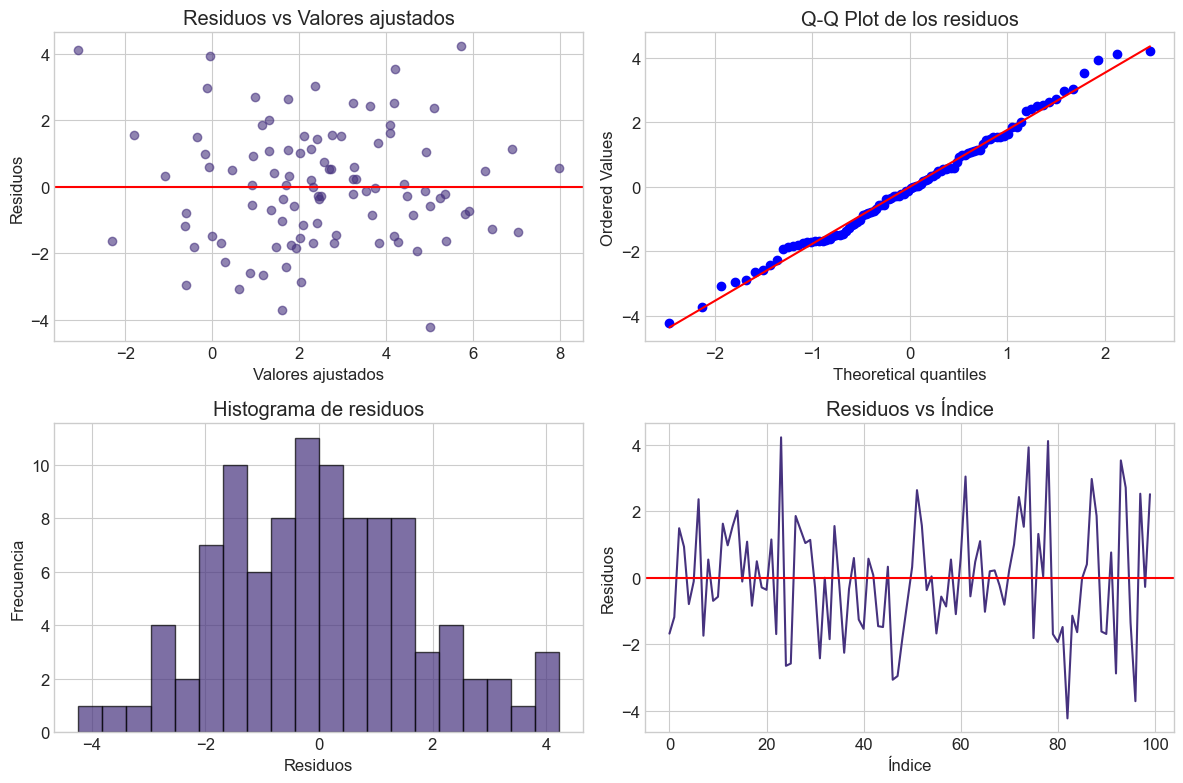


Prueba de Breusch-Pagan para homocedasticidad:
{'LM Estadístico': np.float64(3.4028229720905245), 'LM p-valor': np.float64(0.33358607458429296), 'F Estadístico': np.float64(1.127262084226702), 'F p-valor': np.float64(0.34200843393766456)}


In [15]:
# Aplicar OLS a los datos simulados

# Aplicar nuestro estimador OLS
ols_results = ols_estimator(X_with_intercept, y)

# Comparar con los valores verdaderos
print("Comparación de estimadores OLS con valores verdaderos:")
comparison = pd.DataFrame({
    'Beta verdadero': beta_true,
    'Beta estimado': ols_results['beta_hat'].flatten(),
    'Error estándar': np.sqrt(np.diag(ols_results['var_beta_hat']))
})
comparison.index = ['Intercepto', 'X1', 'X2', 'X3']
print(comparison)

print(f"\nSigma verdadero: {sigma}")
print(f"Sigma estimado (ML): {np.sqrt(ols_results['sigma2_hat']):.4f}")
print(f"Sigma estimado (insesgado): {np.sqrt(ols_results['sigma2_unbiased']):.4f}")

print(f"\nR²: {ols_results['R2']:.4f}")
print(f"R² ajustado: {ols_results['R2_adj']:.4f}")

# Comparar con statsmodels
import statsmodels.api as sm
model = sm.OLS(y, X_with_intercept)
results = model.fit()
print("\nResumen de statsmodels:")
print(results.summary())

# Visualización de los residuos
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(ols_results['fitted_values'], ols_results['residuals'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados')

plt.subplot(2, 2, 2)
stats.probplot(ols_results['residuals'], plot=plt)
plt.title('Q-Q Plot de los residuos')

plt.subplot(2, 2, 3)
plt.hist(ols_results['residuals'], bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')

plt.subplot(2, 2, 4)
plt.plot(ols_results['residuals'])
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.title('Residuos vs Índice')

plt.tight_layout()
plt.show()

# Prueba de homocedasticidad (Breusch-Pagan)
bp_test = het_breuschpagan(ols_results['residuals'], X_with_intercept)
labels = ['LM Estadístico', 'LM p-valor', 'F Estadístico', 'F p-valor']
print("\nPrueba de Breusch-Pagan para homocedasticidad:")
print(dict(zip(labels, bp_test)))


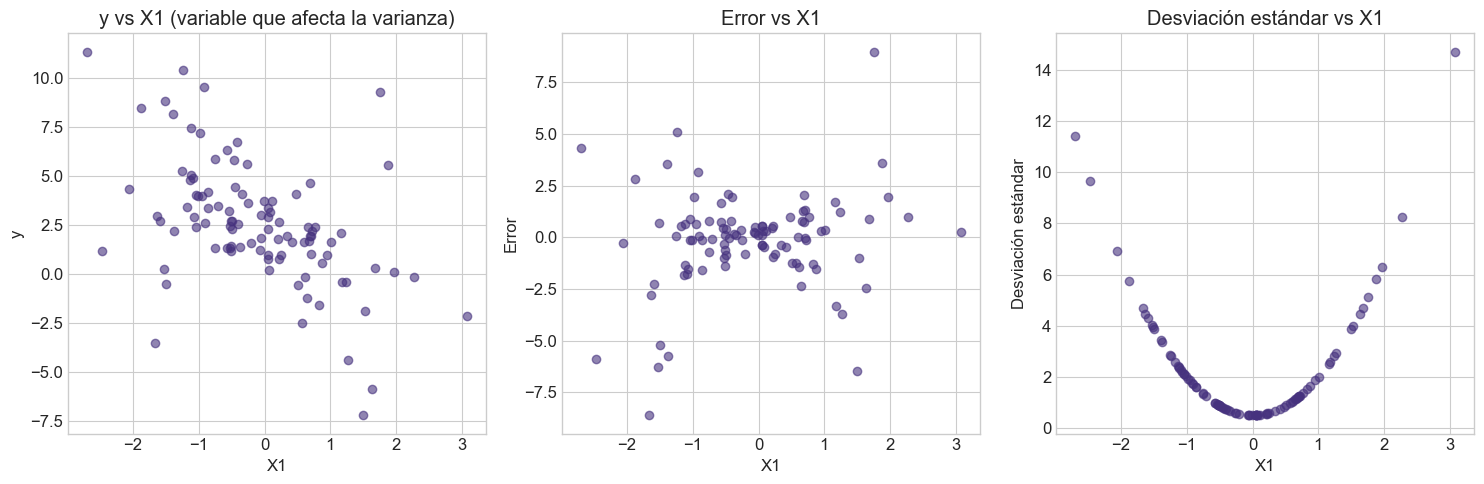

In [16]:
# Generar datos con heterocedasticidad

# Parámetros de la simulación
n = 100  # Número de observaciones
p = 3    # Número de variables (sin incluir intercepto)
beta_true = np.array([2.5, -1.8, 0.7, 1.2])  # Coeficientes verdaderos (incluye intercepto)

# Generar matriz de diseño
X_hetero = np.random.normal(0, 1, size=(n, p))
X_hetero_with_intercept = np.column_stack((np.ones(n), X_hetero))

# Generar errores heterocedásticos (varianza dependiente de X1)
# La varianza aumenta con X1^2
sigma_i = 0.5 + 1.5 * X_hetero[:, 0]**2
epsilon_hetero = np.random.normal(0, 1, size=n) * sigma_i

# Generar la variable dependiente
y_hetero = X_hetero_with_intercept @ beta_true + epsilon_hetero

# Visualizar la heterocedasticidad
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_hetero[:, 0], y_hetero, alpha=0.6)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('y vs X1 (variable que afecta la varianza)')

plt.subplot(1, 3, 2)
plt.scatter(X_hetero[:, 0], epsilon_hetero, alpha=0.6)
plt.xlabel('X1')
plt.ylabel('Error')
plt.title('Error vs X1')

plt.subplot(1, 3, 3)
plt.scatter(X_hetero[:, 0], sigma_i, alpha=0.6)
plt.xlabel('X1')
plt.ylabel('Desviación estándar')
plt.title('Desviación estándar vs X1')

plt.tight_layout()
plt.show()


Resultados de OLS con datos heterocedásticos:
            Beta verdadero  Beta OLS  Error estándar OLS
Intercepto             2.5  2.390680            0.235209
X1                    -1.8 -1.442722            0.219298
X2                     0.7  0.604094            0.226114
X3                     1.2  1.339019            0.247821

Prueba de Breusch-Pagan para homocedasticidad:
{'LM Estadístico': np.float64(4.888801475603621), 'LM p-valor': np.float64(0.18012309748528937), 'F Estadístico': np.float64(1.6448288913023), 'F p-valor': np.float64(0.18415267770159724)}


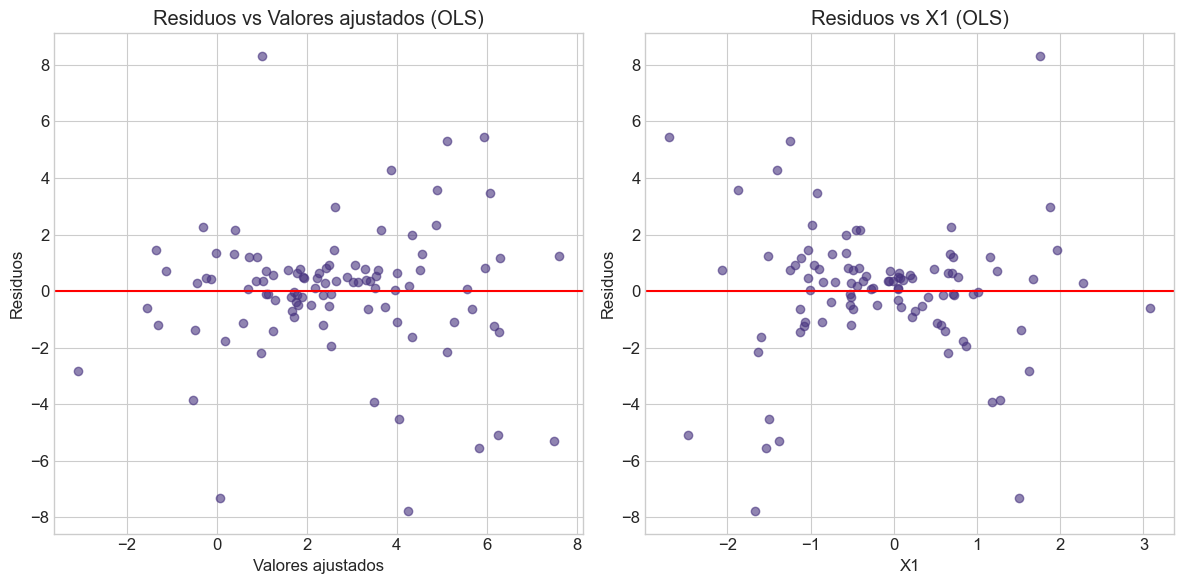


Resultados incluyendo WLS:
            Beta verdadero  Beta OLS  Error estándar OLS  Beta WLS  \
Intercepto             2.5  2.390680            0.235209  2.460032   
X1                    -1.8 -1.442722            0.219298 -1.694393   
X2                     0.7  0.604094            0.226114  0.587465   
X3                     1.2  1.339019            0.247821  1.330596   

            Error estándar WLS  
Intercepto            0.172433  
X1                    0.247534  
X2                    0.174987  
X3                    0.184963  


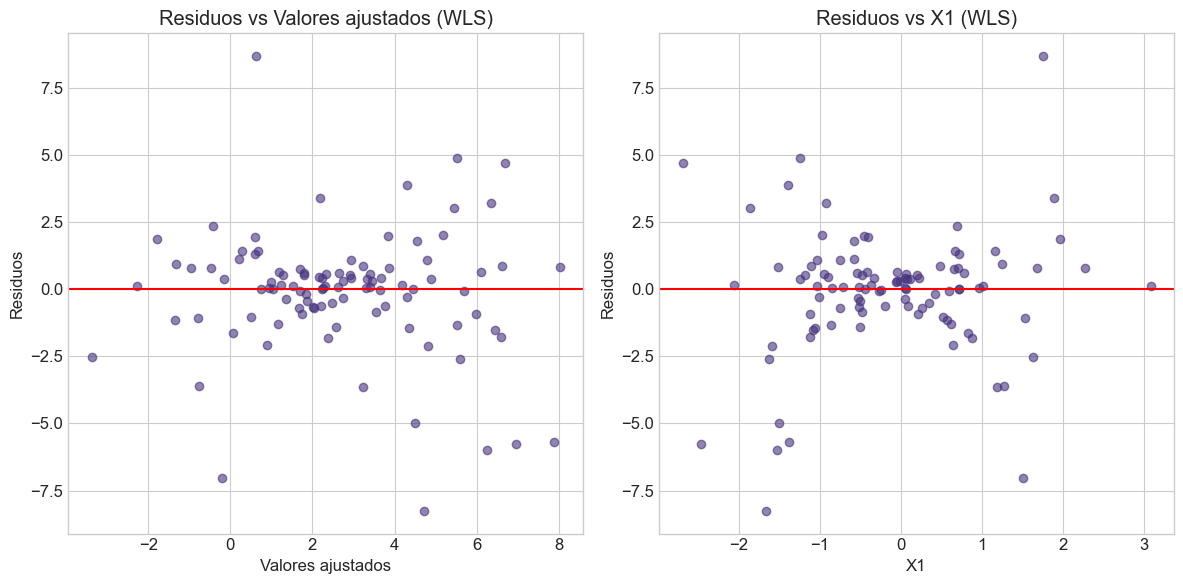

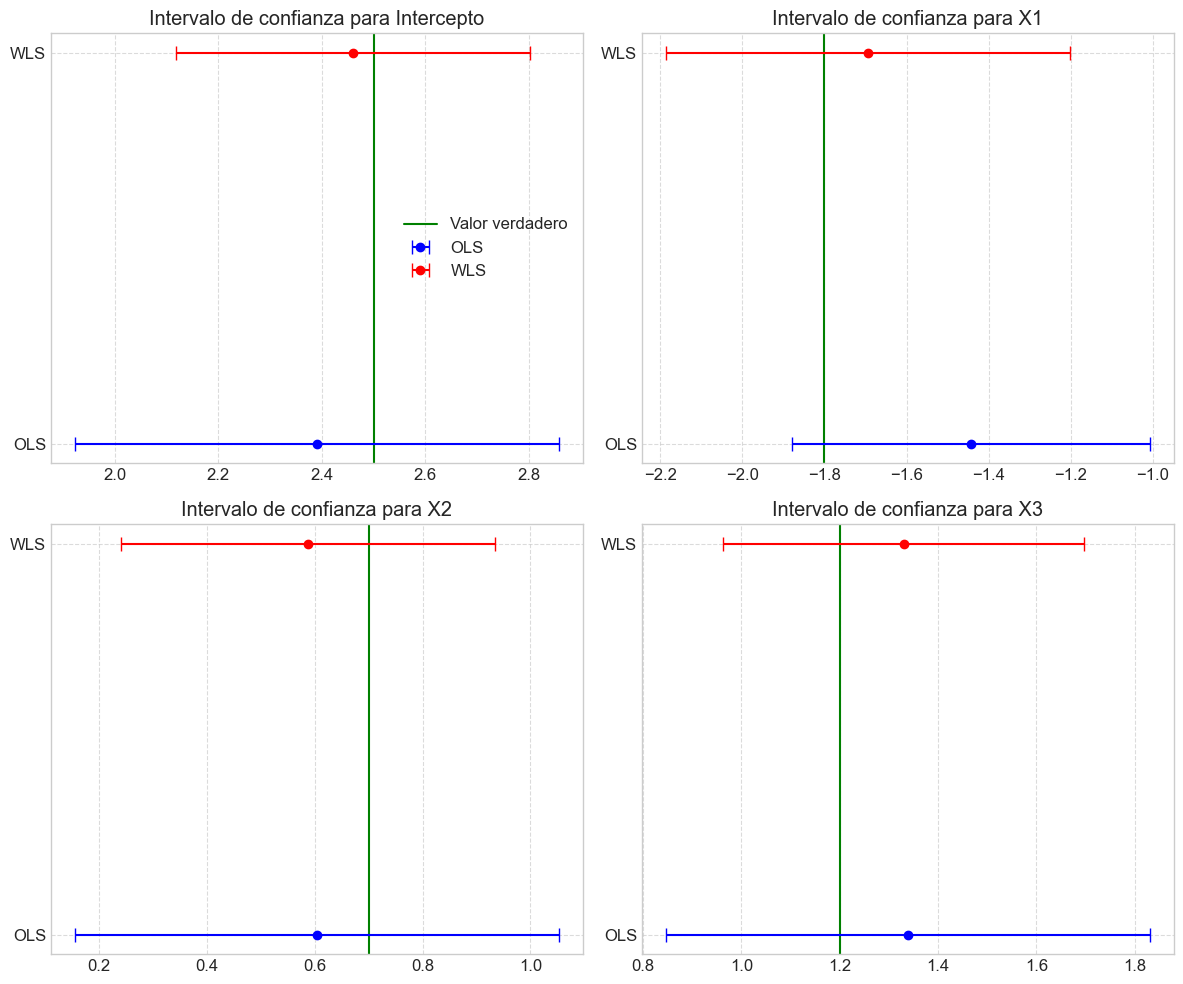

In [17]:
# Aplicar OLS y WLS a datos con heterocedasticidad

# Aplicar OLS a los datos heterocedásticos
ols_hetero_results = ols_estimator(X_hetero_with_intercept, y_hetero)

# Comparar con los valores verdaderos
print("Resultados de OLS con datos heterocedásticos:")
comparison_hetero = pd.DataFrame({
    'Beta verdadero': beta_true,
    'Beta OLS': ols_hetero_results['beta_hat'].flatten(),
    'Error estándar OLS': np.sqrt(np.diag(ols_hetero_results['var_beta_hat']))
})
comparison_hetero.index = ['Intercepto', 'X1', 'X2', 'X3']
print(comparison_hetero)

# Prueba de homocedasticidad (Breusch-Pagan)
bp_test_hetero = het_breuschpagan(ols_hetero_results['residuals'], X_hetero_with_intercept)
labels = ['LM Estadístico', 'LM p-valor', 'F Estadístico', 'F p-valor']
print("\nPrueba de Breusch-Pagan para homocedasticidad:")
print(dict(zip(labels, bp_test_hetero)))

# Visualización de los residuos para datos heterocedásticos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(ols_hetero_results['fitted_values'], ols_hetero_results['residuals'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados (OLS)')

plt.subplot(1, 2, 2)
plt.scatter(X_hetero[:, 0], ols_hetero_results['residuals'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('X1')
plt.ylabel('Residuos')
plt.title('Residuos vs X1 (OLS)')

plt.tight_layout()
plt.show()

# Aplicar WLS utilizando el inverso de la varianza estimada
# Estimamos la varianza a partir de los residuos OLS
# Regresando los residuos cuadrados contra X1
X_var = X_hetero_with_intercept[:, 1]  # X1
X_var_with_const = np.column_stack((np.ones(n), X_var, X_var**2))  # Incluimos X1 y X1^2

# Regresión de residuos cuadrados
resid_sq = ols_hetero_results['residuals']**2
ols_var_model = ols_estimator(X_var_with_const, resid_sq)
sigma_sq_hat = X_var_with_const @ ols_var_model['beta_hat']
weights = 1 / sigma_sq_hat  # Pesos para WLS

# Aplicar WLS
wls_results = wls_estimator(X_hetero_with_intercept, y_hetero, weights)

# Añadir resultados WLS a la comparación
comparison_hetero['Beta WLS'] = wls_results['beta_hat'].flatten()
comparison_hetero['Error estándar WLS'] = np.sqrt(np.diag(wls_results['var_beta_hat']))
print("\nResultados incluyendo WLS:")
print(comparison_hetero)

# Visualizar residuos WLS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(wls_results['fitted_values'], wls_results['residuals'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados (WLS)')

plt.subplot(1, 2, 2)
plt.scatter(X_hetero[:, 0], wls_results['residuals'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('X1')
plt.ylabel('Residuos')
plt.title('Residuos vs X1 (WLS)')

plt.tight_layout()
plt.show()

# Comparar intervalos de confianza
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, n - p - 1)

def calculate_ci(beta_hat, std_err):
    lower = beta_hat - t_crit * std_err
    upper = beta_hat + t_crit * std_err
    return lower, upper

# Datos para visualización
param_names = ['Intercepto', 'X1', 'X2', 'X3']
true_values = beta_true
ols_estimates = ols_hetero_results['beta_hat'].flatten()
ols_std_err = np.sqrt(np.diag(ols_hetero_results['var_beta_hat']))
wls_estimates = wls_results['beta_hat'].flatten()
wls_std_err = np.sqrt(np.diag(wls_results['var_beta_hat']))

# Calcular intervalos de confianza
ols_lower, ols_upper = calculate_ci(ols_estimates, ols_std_err)
wls_lower, wls_upper = calculate_ci(wls_estimates, wls_std_err)

# Visualizar intervalos de confianza
plt.figure(figsize=(12, 10))

for i, param in enumerate(param_names):
    plt.subplot(2, 2, i+1)

    # Valores verdaderos
    plt.axvline(x=true_values[i], color='green', linestyle='-', label='Valor verdadero')

    # Intervalos OLS
    plt.errorbar(x=ols_estimates[i], y=0.3, xerr=[[ols_estimates[i] - ols_lower[i]], [ols_upper[i] - ols_estimates[i]]], 
                 fmt='o', color='blue', capsize=5, label='OLS')

    # Intervalos WLS
    plt.errorbar(x=wls_estimates[i], y=0.7, xerr=[[wls_estimates[i] - wls_lower[i]], [wls_upper[i] - wls_estimates[i]]], 
                 fmt='o', color='red', capsize=5, label='WLS')

    plt.yticks([0.3, 0.7], ['OLS', 'WLS'])
    plt.title(f'Intervalo de confianza para {param}')
    plt.grid(True, linestyle='--', alpha=0.7)
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()


# 8. Ejercicios

## Ejercicio 1: Propiedades del Estimador OLS

1. Demuestre matemáticamente que $E(\boldsymbol{\hat{\beta}}|\mathbf{X}) = \boldsymbol{\beta}$, es decir, que el estimador OLS es insesgado.

2. Demuestre matemáticamente que $Var(\boldsymbol{\hat{\beta}}|\mathbf{X}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$.

3. Implemente una simulación Monte Carlo para verificar numéricamente la insesgadez del estimador OLS. Genere 1000 muestras con los mismos valores de X pero diferentes realizaciones de los errores, y calcule el promedio de los estimadores.

## Ejercicio 2: Estimación por Máxima Verosimilitud

1. Para un modelo de regresión lineal simple $y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$ con $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$, derive paso a paso los estimadores de máxima verosimilitud de $\beta_0$, $\beta_1$ y $\sigma^2$.

2. Implemente una función que calcule los estimadores de máxima verosimilitud para un modelo de regresión lineal simple utilizando un algoritmo iterativo de optimización (puede usar scipy.optimize). Compare los resultados con la solución analítica.

## Ejercicio 3: Homocedasticidad y GLS

1. Genere un conjunto de datos con heterocedasticidad donde la varianza del error es proporcional a $x^2$ y ajuste un modelo mediante OLS. Visualice los residuos para detectar la heterocedasticidad.

2. Implementar el estimador WLS para corregir la heterocedasticidad en los datos del punto anterior. Comparar las estimaciones e intervalos de confianza con los obtenidos por OLS.

3. ¿Cómo afecta la heterocedasticidad a la eficiencia y a la insesgadez de los estimadores OLS?

## Ejercicio 4: Coeficiente de Determinación

1. Demuestre que en regresión lineal simple, el coeficiente de determinación $R^2$ es igual al cuadrado del coeficiente de correlación entre $y$ y $x$.

2. Para un conjunto de datos, calcule $R^2$ de tres formas diferentes: 
   - Como $1 - SSR/SST$
   - Como $SSE/SST$
   - A partir del coeficiente de correlación en el caso de regresión simple

3. Interprete el valor de $R^2$ y $R^2$ ajustado para los datos simulados en este taller.

## Ejercicio 5: Teorema de Gauss-Markov

1. Explique cómo cada una de las condiciones de Gauss-Markov contribuye a que el estimador OLS sea BLUE.

2. Tome los datos con heterocedasticidad generados en el Ejercicio 3 y demuestre empíricamente que el estimador WLS tiene menor varianza que el estimador OLS para estos datos.

3. Para un modelo en el que se viola la condición de no autocorrelación, explique por qué OLS deja de ser BLUE y cómo GLS puede proporcionar un estimador más eficiente.

## Ejercicio 6: Diagnóstico de Residuos

1. Genere un conjunto de datos donde los errores sigan una distribución t de Student con 3 grados de libertad (colas más pesadas que la normal). Realice un diagnóstico completo de los residuos, incluyendo un gráfico Q-Q, y comente los resultados.

2. Implemente su propia versión de la prueba de Breusch-Pagan y aplíquela a los datos con heterocedasticidad generados en el Ejercicio 3. Compare sus resultados con la función het_breuschpagan de statsmodels.

3. ¿Qué otras pruebas o métodos gráficos conoce para verificar los supuestos del modelo lineal? Describa brevemente uno adicional e implemente un ejemplo.



# Referencias Bibliográficas

## Libros

1. Greene, W. H. (2018). *Econometric Analysis* (8th ed.). Pearson.

2. Wooldridge, J. M. (2019). *Introductory Econometrics: A Modern Approach* (7th ed.). Cengage Learning.

3. Davidson, R., & MacKinnon, J. G. (2004). *Econometric Theory and Methods*. Oxford University Press.

4. Hayashi, F. (2000). *Econometrics*. Princeton University Press.

5. Gujarati, D. N., & Porter, D. C. (2009). *Basic Econometrics* (5th ed.). McGraw-Hill.

6. Cameron, A. C., & Trivedi, P. K. (2005). *Microeconometrics: Methods and Applications*. Cambridge University Press.

7. Fox, J. (2015). *Applied Regression Analysis and Generalized Linear Models* (3rd ed.). SAGE Publications.

## Artículos

1. Gauss, C. F. (1823). Theoria combinationis observationum erroribus minimis obnoxiae. *Commentationes Societatis Regiae Scientiarum Gottingensis Recentiores*, 5, 33-62.

2. Markov, A. A. (1900). Wahrscheinlichkeitsrechnung. Teubner, Leipzig.

3. Breusch, T. S., & Pagan, A. R. (1979). A simple test for heteroscedasticity and random coefficient variation. *Econometrica*, 47(5), 1287-1294.

4. White, H. (1980). A heteroskedasticity-consistent covariance matrix estimator and a direct test for heteroskedasticity. *Econometrica*, 48(4), 817-838.

## Recursos en línea

1. StatLect: Statistical Lectures. "The Gauss-Markov Theorem."
   [https://www.statlect.com/fundamentals-of-statistics/Gauss-Markov-theorem](https://www.statlect.com/fundamentals-of-statistics/Gauss-Markov-theorem)

2. Penn State STAT 501: Regression Methods. "The Gauss-Markov Theorem."
   [https://online.stat.psu.edu/stat501/lesson/4/4.1](https://online.stat.psu.edu/stat501/lesson/4/4.1)

3. Econometrics Academy. "Generalized Least Squares."
   [https://sites.google.com/site/econometricsacademy/econometrics-models/generalized-least-squares](https://sites.google.com/site/econometricsacademy/econometrics-models/generalized-least-squares)

4. Statsmodels Documentation. "Linear Regression."
   [https://www.statsmodels.org/stable/regression.html](https://www.statsmodels.org/stable/regression.html)
